In [1]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

In [ ]:
panel = pd.read_csv("Final_Data.csv")

In [3]:
panel.head()

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,game_id,team,report_primary_injury,report_status,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury
0,0,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,1.0,K,SPEC,...,2014_01_SF_DAL,SF,NaN,NaN,2014-09-07,Sunday,True,False,False,False
1,1,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,2.0,K,SPEC,...,2014_02_CHI_SF,SF,NaN,NaN,2014-09-14,Sunday,True,False,False,False
2,2,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,3.0,K,SPEC,...,2014_03_SF_ARI,SF,NaN,NaN,2014-09-21,Sunday,True,False,False,False
3,3,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,4.0,K,SPEC,...,2014_04_PHI_SF,SF,NaN,NaN,2014-09-28,Sunday,True,False,False,False
4,4,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,5.0,K,SPEC,...,2014_05_KC_SF,SF,NaN,NaN,2014-10-05,Sunday,True,False,False,False


In [4]:
import nflreadpy as nfl

rosters = nfl.load_rosters_weekly([i for i in range(2014, 2026)]).to_pandas()

In [5]:
rosters.head()

,season,team,position,depth_chart_position,jersey_number,status,full_name,first_name,last_name,birth_date,...,game_type,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number
0,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
1,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
2,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
3,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
4,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None


In [6]:
rosters.columns

Index(['season', 'team', 'position', 'depth_chart_position', 'jersey_number',
       'status', 'full_name', 'first_name', 'last_name', 'birth_date',
       'height', 'weight', 'college', 'gsis_id', 'espn_id', 'sportradar_id',
       'yahoo_id', 'rotowire_id', 'pff_id', 'pfr_id', 'fantasy_data_id',
       'sleeper_id', 'years_exp', 'headshot_url', 'ngs_position', 'week',
       'game_type', 'status_description_abbr', 'football_name', 'esb_id',
       'gsis_it_id', 'smart_id', 'entry_year', 'rookie_year', 'draft_club',
       'draft_number'],
      dtype='object')

In [7]:
check = panel.merge(
    rosters[["gsis_id", "season", "week", "status"]],
    how="left",
    on=["gsis_id", "season", "week"],
    indicator=True,
)

In [8]:
check._merge.value_counts()

_merge
both          222921
left_only        246
right_only         0
Name: count, dtype: int64

In [9]:
check.loc[check["_merge"] == "left_only"]

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,report_primary_injury,report_status,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge
262,262,00-0019546,NaN,NaN,NaN,NaN,2014.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,left_only
785,785,00-0020578,Matt Bryant,1975-05-29,69.0,203.0,2015.0,14.0,K,SPEC,...,right Quadricep,Out,NaN,NaN,False,True,True,True,NaN,left_only
945,945,00-0020972,Billy Cundiff,1980-03-30,73.0,212.0,2014.0,15.0,K,SPEC,...,right Knee,Questionable,NaN,NaN,False,True,True,True,NaN,left_only
1342,1342,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2015.0,16.0,QB,QB,...,left Shoulder,Out,NaN,NaN,False,True,True,True,NaN,left_only
1512,1512,00-0022017,NaN,NaN,NaN,NaN,2014.0,17.0,NaN,NaN,...,Shoulder,Out,NaN,NaN,False,True,True,True,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106549,104981,00-0032189,Tony Steward,1992-09-19,72.0,241.0,2015.0,14.0,LB,LB,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,left_only
107065,105497,00-0032205,NaN,NaN,NaN,NaN,2015.0,14.0,NaN,NaN,...,Knee,Out,NaN,NaN,False,True,True,True,NaN,left_only
109237,107669,00-0032265,Mario Edwards,1994-01-25,75.0,280.0,2015.0,16.0,NaN,NaN,...,Neck,Out,NaN,NaN,False,True,True,True,NaN,left_only
109523,107955,00-0032271,D'Joun Smith,1992-09-23,71.0,193.0,2015.0,2.0,CB,DB,...,NaN,NaN,NaN,NaN,False,False,False,False,NaN,left_only


In [10]:
# just drop those 246 entries who had injury/other data but not roster data for now?
# note somewhere that we only our player-week panel only includes ppl who were on weekly rosters
final = check.loc[check["_merge"] == "both"]

In [11]:
# just confirming that gsis_id is consistent across seasons
final.loc[(final["display_name"] == "Tony Romo")].sort_values(by="week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,report_primary_injury,report_status,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge
1317,1317,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2014.0,1.0,QB,QB,...,Back,Probable,2014-09-07,Sunday,True,True,True,False,ACT,both
1335,1335,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2015.0,1.0,QB,QB,...,Back,Probable,2015-09-13,Sunday,True,True,True,False,RES,both
1343,1343,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2016.0,1.0,QB,QB,...,Back,Out,NaN,NaN,False,True,True,True,ACT,both
1318,1318,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2014.0,2.0,QB,QB,...,Back,Probable,2014-09-14,Sunday,True,True,True,False,ACT,both
1336,1336,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2015.0,2.0,QB,QB,...,Back,Probable,2015-09-20,Sunday,True,True,True,False,RES,both
1344,1344,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2016.0,2.0,QB,QB,...,Back,Out,NaN,NaN,False,True,True,True,ACT,both
1319,1319,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2014.0,3.0,QB,QB,...,Back,Probable,2014-09-21,Sunday,True,True,True,False,ACT,both
1345,1345,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2016.0,3.0,QB,QB,...,Back,Out,NaN,NaN,False,True,True,True,ACT,both
1346,1346,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2016.0,4.0,QB,QB,...,Back,Out,NaN,NaN,False,True,True,True,ACT,both
1320,1320,00-0021678,Tony Romo,1980-04-21,74.0,230.0,2014.0,4.0,QB,QB,...,Back,Probable,2014-09-28,Sunday,True,True,True,False,ACT,both


In [12]:
# create binary column for whether a given week is a return week (from injury) for a player
# using only the missed due to injury column for this because that already considers both injury report & snap count

final_sorted = final.sort_values(by=["gsis_id", "season", "week"])
final_sorted["is_return_week"] = (
    (final_sorted["missed_due_to_injury"] == False) & (final_sorted["played"])
) & (
    (
        final_sorted.groupby(by=["gsis_id", "season"])["missed_due_to_injury"].shift(
            fill_value=False
        )
    )
    | (
        final_sorted.groupby(by=["gsis_id", "season"])["played"].shift(fill_value=True)
        == False
    )
)

In [13]:
# final_sorted = final.sort_values(by=["gsis_id", "season", "week"])
# final_sorted["is_return_week"] = (final_sorted["status"] == "ACT") & (
#     final_sorted.groupby(by=["gsis_id", "season"])["status"].shift(fill_value="ACT")
#     != "ACT"
# )

In [14]:
final_sorted["return_week"] = final_sorted["week"].where(final_sorted["is_return_week"])

In [15]:
final_sorted["return_week"] = final_sorted.groupby(by=["gsis_id", "season"])[
    "return_week"
].ffill()

In [16]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2021)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week
201180,199600,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,1.0,WR,WR,...,2021-09-12,Sunday,True,False,False,False,ACT,both,False,NaN
201181,199601,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,3.0,WR,WR,...,2021-09-26,Sunday,True,False,False,False,ACT,both,False,NaN
201182,199602,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,4.0,WR,WR,...,2021-10-03,Sunday,True,False,False,False,ACT,both,False,NaN
201183,199603,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,5.0,WR,WR,...,2021-10-10,Sunday,True,False,False,False,ACT,both,False,NaN
201184,199604,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,6.0,WR,WR,...,2021-10-17,Sunday,True,True,True,False,ACT,both,False,NaN
201185,199605,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,7.0,WR,WR,...,NaN,NaN,False,True,True,True,INA,both,False,NaN
201186,199606,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,8.0,WR,WR,...,2021-11-01,Monday,True,True,True,False,ACT,both,True,8.0
201187,199607,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,9.0,WR,WR,...,2021-11-07,Sunday,True,False,False,False,ACT,both,False,8.0
201188,199608,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,11.0,WR,WR,...,2021-11-22,Monday,True,False,False,False,ACT,both,False,8.0
201189,199609,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,12.0,WR,WR,...,NaN,NaN,False,True,True,True,INA,both,False,8.0


In [17]:
final_sorted.loc[final_sorted["missed_due_to_injury"], "return_week"] = None

In [18]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2021)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,gameday,weekday,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week
201180,199600,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,1.0,WR,WR,...,2021-09-12,Sunday,True,False,False,False,ACT,both,False,NaN
201181,199601,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,3.0,WR,WR,...,2021-09-26,Sunday,True,False,False,False,ACT,both,False,NaN
201182,199602,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,4.0,WR,WR,...,2021-10-03,Sunday,True,False,False,False,ACT,both,False,NaN
201183,199603,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,5.0,WR,WR,...,2021-10-10,Sunday,True,False,False,False,ACT,both,False,NaN
201184,199604,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,6.0,WR,WR,...,2021-10-17,Sunday,True,True,True,False,ACT,both,False,NaN
201185,199605,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,7.0,WR,WR,...,NaN,NaN,False,True,True,True,INA,both,False,NaN
201186,199606,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,8.0,WR,WR,...,2021-11-01,Monday,True,True,True,False,ACT,both,True,8.0
201187,199607,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,9.0,WR,WR,...,2021-11-07,Sunday,True,False,False,False,ACT,both,False,8.0
201188,199608,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,11.0,WR,WR,...,2021-11-22,Monday,True,False,False,False,ACT,both,False,8.0
201189,199609,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2021.0,12.0,WR,WR,...,NaN,NaN,False,True,True,True,INA,both,False,NaN


In [19]:
final_sorted["weeks_since_return"] = final_sorted["week"] - final_sorted["return_week"]

In [20]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,weekday,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week,weeks_since_return
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,Sunday,True,False,False,False,ACT,both,False,NaN,NaN
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,Sunday,True,True,True,False,ACT,both,False,NaN,NaN
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,NaN,False,True,True,True,INA,both,False,NaN,NaN
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,NaN,False,True,True,True,INA,both,False,NaN,NaN
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,NaN,False,True,True,True,INA,both,False,NaN,NaN
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,NaN,False,True,True,True,INA,both,False,NaN,NaN
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,NaN,False,True,True,True,INA,both,False,NaN,NaN
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,NaN,False,False,False,False,CUT,both,False,NaN,NaN
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,Sunday,True,False,False,False,ACT,both,True,9.0,0.0
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,Sunday,True,False,False,False,ACT,both,False,9.0,1.0


In [21]:
final_sorted["is_injury_start"] = (final_sorted["missed_due_to_injury"] == True) & (
    final_sorted.groupby(by=["gsis_id", "season"])["missed_due_to_injury"].shift(
        fill_value=False
    )
    == False
)

In [22]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,played,listed_on_report,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week,weeks_since_return,is_injury_start
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,True,False,False,False,ACT,both,False,NaN,NaN,False
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,True,True,True,False,ACT,both,False,NaN,NaN,False
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,False,True,True,True,INA,both,False,NaN,NaN,True
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,False,True,True,True,INA,both,False,NaN,NaN,False
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,False,True,True,True,INA,both,False,NaN,NaN,False
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,False,True,True,True,INA,both,False,NaN,NaN,False
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,False,True,True,True,INA,both,False,NaN,NaN,False
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,False,False,False,False,CUT,both,False,NaN,NaN,False
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,True,False,False,False,ACT,both,True,9.0,0.0,False
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,True,False,False,False,ACT,both,False,9.0,1.0,False


In [23]:
final_sorted["total_injuries_current_season"] = final_sorted.groupby(
    by=["gsis_id", "season"]
)["is_injury_start"].cumsum()

In [24]:
final_sorted["total_injuries_current_season"] = final_sorted.groupby(
    by=["gsis_id", "season"]
)["total_injuries_current_season"].shift(fill_value=0)

In [25]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,listed_on_report,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,False,False,False,ACT,both,False,NaN,NaN,False,0
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,True,True,False,ACT,both,False,NaN,NaN,False,0
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,True,True,True,INA,both,False,NaN,NaN,True,0
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,True,True,True,INA,both,False,NaN,NaN,False,1
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,True,True,True,INA,both,False,NaN,NaN,False,1
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,True,True,True,INA,both,False,NaN,NaN,False,1
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,True,True,True,INA,both,False,NaN,NaN,False,1
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,False,False,False,CUT,both,False,NaN,NaN,False,1
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,False,False,False,ACT,both,True,9.0,0.0,False,1
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,False,False,False,ACT,both,False,9.0,1.0,False,1


In [26]:
# this we prob don't need since we only have 2014 onwards data oops

# final_sorted["total_injuries_career"] = final_sorted.groupby(by=["gsis_id"])[
#     "is_injury_start"
# ].cumsum()

In [27]:
# final_sorted["total_injuries_career"] = final_sorted.groupby(by=["gsis_id"])[
#     "total_injuries_career"
# ].shift(fill_value=0)

In [28]:
final_sorted["player_age"] = (
    pd.to_datetime(final_sorted["gameday"], format="%Y-%m-%d")
    - pd.to_datetime(final_sorted["birth_date"], format="%Y-%m-%d")
).dt.total_seconds()

In [29]:
final_sorted["player_age"] = np.floor((final_sorted["player_age"] / 3600 / 24 / 365.25))

In [30]:
final_sorted["player_age"] = final_sorted.groupby(by=["gsis_id", "season"])[
    "player_age"
].transform(lambda x: x.ffill().bfill())

In [31]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,listed_out,missed_due_to_injury,status,_merge,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,player_age
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,False,False,ACT,both,False,NaN,NaN,False,0,23.0
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,True,False,ACT,both,False,NaN,NaN,False,0,23.0
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,True,True,INA,both,False,NaN,NaN,True,0,23.0
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,True,True,INA,both,False,NaN,NaN,False,1,23.0
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,True,True,INA,both,False,NaN,NaN,False,1,23.0
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,True,True,INA,both,False,NaN,NaN,False,1,23.0
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,True,True,INA,both,False,NaN,NaN,False,1,23.0
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,False,False,CUT,both,False,NaN,NaN,False,1,23.0
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,False,False,ACT,both,True,9.0,0.0,False,1,23.0
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,False,False,ACT,both,False,9.0,1.0,False,1,23.0


In [32]:
final_sorted["gameday"] = pd.to_datetime(final_sorted["gameday"])

final_sorted["rest_days_since_last_play"] = (
    final_sorted["gameday"] - final_sorted["gameday"].ffill().shift()
).dt.days

In [33]:
final_sorted.loc[
    (final_sorted["display_name"] == "Kadarius Toney")
    & (final_sorted["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,missed_due_to_injury,status,_merge,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,player_age,rest_days_since_last_play
201195,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,False,ACT,both,False,NaN,NaN,False,0,23.0,259.0
201196,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,False,ACT,both,False,NaN,NaN,False,0,23.0,7.0
201197,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,True,INA,both,False,NaN,NaN,True,0,23.0,NaN
201198,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,True,INA,both,False,NaN,NaN,False,1,23.0,NaN
201199,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,True,INA,both,False,NaN,NaN,False,1,23.0,NaN
201200,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,True,INA,both,False,NaN,NaN,False,1,23.0,NaN
201201,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,True,INA,both,False,NaN,NaN,False,1,23.0,NaN
201202,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,False,CUT,both,False,NaN,NaN,False,1,23.0,NaN
201203,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,False,ACT,both,True,9.0,0.0,False,1,23.0,49.0
201204,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,False,ACT,both,False,9.0,1.0,False,1,23.0,7.0


In [34]:
sched = nfl.load_schedules().to_pandas()[["game_id", "surface"]]

In [35]:
surf = final_sorted.drop("_merge", axis=1).merge(
    sched, how="left", on="game_id", indicator=True
)

In [36]:
surf._merge.value_counts()

_merge
both          193181
left_only      29740
right_only         0
Name: count, dtype: int64

In [37]:
# confirming that left only rows are from cases where the player didn't play (so we don't care abt surface)
surf.loc[(surf["played"] == True) & (surf["_merge"] == "left_only")]

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,status,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,player_age,rest_days_since_last_play,surface,_merge


In [38]:
surf.head()

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,status,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,player_age,rest_days_since_last_play,surface,_merge
0,0,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,1.0,K,SPEC,...,ACT,False,NaN,NaN,False,0,39.0,NaN,matrixturf,both
1,1,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,2.0,K,SPEC,...,ACT,False,NaN,NaN,False,0,39.0,7.0,grass,both
2,2,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,3.0,K,SPEC,...,ACT,False,NaN,NaN,False,0,39.0,7.0,grass,both
3,3,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,4.0,K,SPEC,...,ACT,False,NaN,NaN,False,0,39.0,7.0,grass,both
4,4,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,5.0,K,SPEC,...,ACT,False,NaN,NaN,False,0,39.0,7.0,grass,both


In [39]:
season_change = surf["season"] != surf.groupby("gsis_id")["season"].shift()
surf.loc[season_change, "rest_days_since_last_play"] = None

In [40]:
# re-injury predictors: age, weeks since return, prior injuries in season, position, rest since last game, surface, snaps (just raw for now)
# could also maybe include last_injury_duration, last_injury_type

surf["injured_after_this_week"] = (
    surf.groupby(by=["gsis_id", "season"])["is_injury_start"].shift(-1).fillna(False)
)

C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3293970189.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  surf.groupby(by=["gsis_id", "season"])["is_injury_start"].shift(-1).fillna(False)


In [41]:
surf.loc[
    (surf["display_name"] == "Kadarius Toney") & (surf["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,is_return_week,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,player_age,rest_days_since_last_play,surface,_merge,injured_after_this_week
200949,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,False,NaN,NaN,False,0,23.0,NaN,grass,both,False
200950,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,False,NaN,NaN,False,0,23.0,7.0,fieldturf,both,True
200951,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,False,NaN,NaN,True,0,23.0,NaN,NaN,left_only,False
200952,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,False,NaN,NaN,False,1,23.0,NaN,NaN,left_only,False
200953,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,False,NaN,NaN,False,1,23.0,NaN,NaN,left_only,False
200954,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,False,NaN,NaN,False,1,23.0,NaN,NaN,left_only,False
200955,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,False,NaN,NaN,False,1,23.0,NaN,NaN,left_only,False
200956,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,False,NaN,NaN,False,1,23.0,NaN,NaN,left_only,False
200957,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,True,9.0,0.0,False,1,23.0,49.0,grass,both,False
200958,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,False,9.0,1.0,False,1,23.0,7.0,grass,both,False


In [42]:
surf["most_recent_injury"] = surf.groupby(by=["gsis_id", "season"])[
    "report_primary_injury"
].ffill()

In [43]:
surf.loc[
    (surf["display_name"] == "Kadarius Toney") & (surf["season"] == 2022)
].sort_values("week")

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,player_age,rest_days_since_last_play,surface,_merge,injured_after_this_week,most_recent_injury
200949,199615,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,1.0,WR,WR,...,NaN,NaN,False,0,23.0,NaN,grass,both,False,NaN
200950,199616,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,2.0,WR,WR,...,NaN,NaN,False,0,23.0,7.0,fieldturf,both,True,Hamstring
200951,199617,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,3.0,WR,WR,...,NaN,NaN,True,0,23.0,NaN,NaN,left_only,False,Hamstring
200952,199618,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,4.0,WR,WR,...,NaN,NaN,False,1,23.0,NaN,NaN,left_only,False,Hamstring
200953,199619,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,5.0,WR,WR,...,NaN,NaN,False,1,23.0,NaN,NaN,left_only,False,Hamstring
200954,199620,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,6.0,WR,WR,...,NaN,NaN,False,1,23.0,NaN,NaN,left_only,False,Hamstring
200955,199621,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,7.0,WR,WR,...,NaN,NaN,False,1,23.0,NaN,NaN,left_only,False,Hamstring
200956,199622,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,8.0,WR,WR,...,NaN,NaN,False,1,23.0,NaN,NaN,left_only,False,Hamstring
200957,199623,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,9.0,WR,WR,...,9.0,0.0,False,1,23.0,49.0,grass,both,False,Hamstring
200958,199624,00-0036913,Kadarius Toney,1999-01-27,72.0,193.0,2022.0,10.0,WR,WR,...,9.0,1.0,False,1,23.0,7.0,grass,both,False,Hamstring


In [44]:
# normalize the injury string
import re


# combine categories
def normalize_injury(text):
    if text is None or str(text).strip() == "" or text == "None" or text == "nan":
        return "None"

    t = text.lower()

    # 1. Knee
    if (
        "knee" in t
        or "acl" in t
        or "pcl" in t
        or "mcl" in t
        or "meniscus" in t
        or "patella" in t
    ):
        return "Knee"

    # 2. Ankle / Foot
    if "ankle" in t or "foot" in t or "toe" in t or "achilles" in t or "heel" in t:
        return "Ankle/Foot"

    # 3. Hamstring
    if "hamstring" in t or "hammie" in t:
        return "Hamstring"

    # 4. Quad / Thigh / Groin
    if "quad" in t or "quadricep" in t or "thigh" in t or "groin" in t:
        return "Quad/Thigh/Groin"

    # 5. Shoulder
    if "shoulder" in t or "rotator" in t or "ac joint" in t or "labrum" in t:
        return "Shoulder"

    # 6. Hip / Glute
    if "hip" in t or "glute" in t or "hip flexor" in t:
        return "Hip/Glute"

    # 7. Back
    if "back" in t or "lumbar" in t:
        return "Back"

    # 8. Neck
    if "neck" in t or "cervical" in t:
        return "Neck"

    # 9. Arm
    if "arm" in t or "bicep" in t or "tricep" in t or "forearm" in t:
        return "Arm"

    # 10. Wrist / Hand
    if "wrist" in t or "hand" in t or "finger" in t or "thumb" in t:
        return "Wrist/Hand"

    # 11. Chest / Rib
    if "chest" in t or "rib" in t or "sternum" in t:
        return "Chest/Rib"

    # 12. Abdomen / Core
    if "abdomen" in t or "abdominal" in t or "oblique" in t or "stomach" in t:
        return "Abdomen/Core"

    # 13. Concussion / Head
    if "concussion" in t or "head" in t or "migraine" in t:
        return "Head/Concussion"

    # 14. Illness / Non injury
    if (
        "illness" in t
        or "flu" in t
        or "covid" in t
        or "non-injury" in t
        or "personal" in t
        or "rest" in t
    ):
        return "Illness/OtherNonInjury"

    # 15. Suspension
    if "susp" in t:
        return "None"

    # 16. Fallback
    return "Other"


surf["most_recent_injury"] = (
    surf["most_recent_injury"].astype(str).apply(normalize_injury)
)

In [45]:
surf["most_recent_injury"].value_counts()

most_recent_injury
None                      133634
Ankle/Foot                 18198
Knee                       14016
Hamstring                  10475
Quad/Thigh/Groin            7866
Other                       7013
Shoulder                    6476
Head/Concussion             6126
Illness/OtherNonInjury      4196
Back                        3560
Hip/Glute                   3013
Wrist/Hand                  2778
Chest/Rib                   2309
Neck                        1736
Abdomen/Core                1070
Arm                          455
Name: count, dtype: int64

In [46]:
len(surf)

222921

In [47]:
# I think we can get total offensive/defensive snaps and snaps the player played in from this with some finagling
# but can try that later if we have time?? for now I just left snap count as a feature
pbp = nfl.load_pbp().to_pandas()

In [48]:
for i in pbp.columns:
    print(i)

play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa


In [49]:
# final re-injury dataset: player-weeks where player plays and had a previous injury this season
play_filtered = surf.loc[
    (surf["played"]) & (surf["total_injuries_current_season"] >= 1)
]

In [50]:
# re-injury label: 1 if player had previous injury, plays that week, and is injured the following week
play_filtered["reinjured_next_week"] = (
    (play_filtered["total_injuries_current_season"] >= 1)
    & (play_filtered["injured_after_this_week"])
    & play_filtered["played"]
).astype(int)

In [51]:
play_filtered = play_filtered[
    [
        "reinjured_next_week",  # outcome
        "player_age",
        "position_group_y",
        "season",  # not a predictor but need for the time-based CV
        # "week",
        "rest_days_since_last_play",
        "surface",
        "total_snaps",
        "weeks_since_return",  # wouldn't use these last three for injury risk
        "total_injuries_current_season",
        "most_recent_injury",
        "gsis_id" #added for future use in mixed effects
        
    ]
]

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

import xgboost as xgb
import shap

In [53]:
play_filtered["surface"] = play_filtered["surface"].astype("category")
play_filtered["most_recent_injury"] = play_filtered["most_recent_injury"].astype(
    "category"
)
play_filtered["position_group_y"] = play_filtered["position_group_y"].astype("category")
# play_filtered["week"] = play_filtered["week"].astype("category")

In [54]:
play_filtered.head()

,reinjured_next_week,player_age,position_group_y,season,rest_days_since_last_play,surface,total_snaps,weeks_since_return,total_injuries_current_season,most_recent_injury,gsis_id
74,0,43.0,SPEC,2018.0,14.0,grass,6.0,0.0,1,Hip/Glute,00-0004091
120,0,39.0,QB,2015.0,49.0,grass,29.0,0.0,1,Ankle/Foot,00-0010346
121,0,39.0,QB,2015.0,14.0,grass,74.0,2.0,1,Ankle/Foot,00-0010346
122,0,39.0,QB,2015.0,7.0,grass,68.0,3.0,1,Ankle/Foot,00-0010346
123,0,39.0,QB,2015.0,14.0,grass,60.0,4.0,1,Ankle/Foot,00-0010346


In [55]:
play_filtered["reinjured_next_week"].value_counts() / len(play_filtered)

reinjured_next_week
0    0.93532
1    0.06468
Name: count, dtype: float64

In [56]:
from sklearn.metrics import average_precision_score, roc_auc_score, accuracy_score, confusion_matrix


In [57]:
seasons = np.arange(2014, 2025)
all_shap = []
all_X = []

for season in range(1, len(seasons)):
    test_season = seasons[season]
    train_seasons = seasons[:season]
    print(train_seasons, test_season)
    train_df = play_filtered.loc[play_filtered["season"].isin(train_seasons)]
    test_df = play_filtered.loc[play_filtered["season"] == test_season]
    model = xgb.XGBClassifier(
        n_estimators=100,
        objective="binary:logistic",
        enable_categorical=True,
        random_state=42,
    )
    X_train = train_df.drop(["reinjured_next_week", "season", "gsis_id"], axis=1)
    y_train = train_df["reinjured_next_week"]
    X_test = test_df.drop(["reinjured_next_week", "season", "gsis_id"], axis=1)
    y_test = test_df["reinjured_next_week"]
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)
    print(f"AP: {average_precision_score(y_test, y_prob)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"CM: {confusion_matrix(y_test, y_pred)}")

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    # handle binary case (list) vs array
    if isinstance(shap_values, list):
        shap_values_fold = shap_values[1]
    else:
        shap_values_fold = shap_values

    all_shap.append(shap_values_fold)
    all_X.append(X_test.values)   # or X_test.copy() if you want a DataFrame

# after the loop
shap_all = np.vstack(all_shap)
X_all = np.vstack(all_X)
feature_names = X_test.columns


[2014] 2015
AP: 0.1337638968580303
ROC AUC: 0.6027073177449117
Accuracy: 0.9064404982772329
CM: [[3401   57]
 [ 296   19]]
[2014 2015] 2016
AP: 0.10441582650470535
ROC AUC: 0.6246550643193498
Accuracy: 0.9178505250154416
CM: [[2964   57]
 [ 209    8]]
[2014 2015 2016] 2017
AP: 0.10908734233291975
ROC AUC: 0.5941403454827401
Accuracy: 0.930111038536904
CM: [[2836   43]
 [ 171   12]]
[2014 2015 2016 2017] 2018
AP: 0.11653316468542982
ROC AUC: 0.6494015484410963
Accuracy: 0.928042328042328
CM: [[2627   28]
 [ 176    4]]
[2014 2015 2016 2017 2018] 2019
AP: 0.08538656152951252
ROC AUC: 0.6221083484940367
Accuracy: 0.9363636363636364
CM: [[2881   29]
 [ 167    3]]
[2014 2015 2016 2017 2018 2019] 2020
AP: 0.11455944576695426
ROC AUC: 0.5955971058575243
Accuracy: 0.9322239031770045
CM: [[3077   14]
 [ 210    4]]
[2014 2015 2016 2017 2018 2019 2020] 2021
AP: 0.09594017677507966
ROC AUC: 0.6159538796321635
Accuracy: 0.931899641577061
CM: [[3373   33]
 [ 214    7]]
[2014 2015 2016 2017 2018 2019 

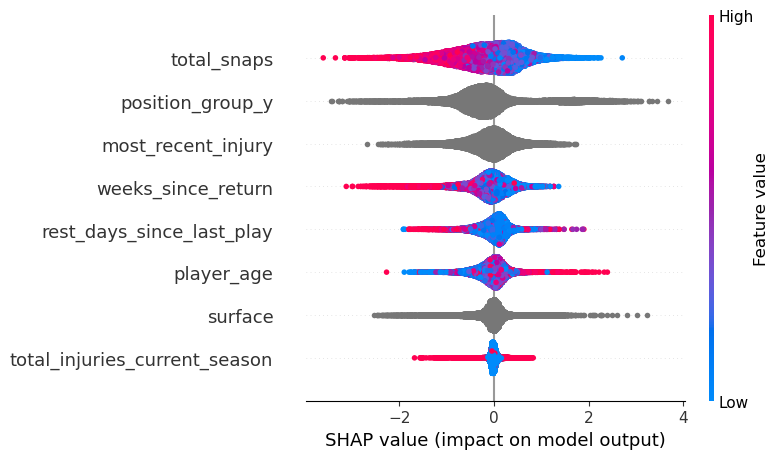

In [58]:
shap.summary_plot(shap_all, X_all, feature_names=feature_names)


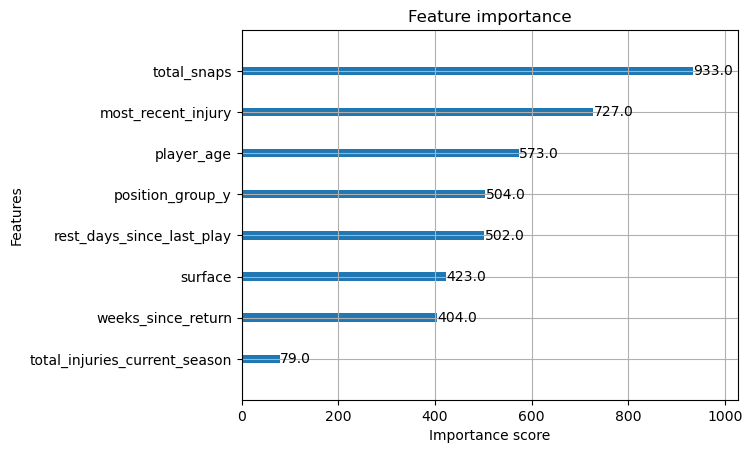

In [59]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot the feature importance
plot_importance(model)
plt.rcParams['figure.figsize'] = [6, 4] # Adjust plot size
plt.show()

Can stack these across the folds and get average but basically they all show a similar pattern.

For injury risk, I think you can start with the surf table and then filter it appropriately and then the rest is basically the same except for removing the features you don't need? And then you can see if we wanna change features further.

So for ex, you could filter to your population from surf since it should have all the features we want for now, add your injury label column, filter columns so you only have the features you need and do the cv and modeling same as above??? idk but i'm just copy pasting the last part here because I feel like what I have above is really confusing

In [60]:
first_timers = surf.loc[
surf["total_injuries_current_season"] < 1
]

In [61]:
# trying with next week injury as outcome bc makes more sense
nextweek = first_timers[
    [
        "player_age",
        "position_group_y",
        "season",  # not a predictor but need for the time-based CV
        # "week",
        "rest_days_since_last_play",
        "surface",
        "total_snaps",
        "injured_after_this_week",  # is this the outcome or should it be missed this game?
    # also could maybe use most recent injury if they were injured last season?
        "gsis_id"
    ]
]

In [62]:
nextweek["surface"] = nextweek["surface"].astype("category")
#filtered_cols["most_recent_injury"] = filtered_cols["most_recent_injury"].astype(
#    "category"
#)
nextweek['injured_after_this_week'] = nextweek['injured_after_this_week'].astype('int')
nextweek["position_group_y"] = nextweek["position_group_y"].astype("category")

In [63]:
# trying with outcome variable being next week injured 
seasons = np.arange(2014, 2025)
all_shap = []
all_X = []
for season in range(1, len(seasons)):
    test_season = seasons[season]
    train_seasons = seasons[:season]
    print(train_seasons, test_season)
    train_df = nextweek.loc[nextweek["season"].isin(train_seasons)]
    test_df = nextweek.loc[nextweek["season"] == test_season]
    model = xgb.XGBClassifier(
        n_estimators=100,
        objective="binary:logistic",
        enable_categorical=True,
        random_state=42,
    )
    X_train = train_df.drop(["injured_after_this_week", "season", "gsis_id"], axis=1)
    y_train = train_df["injured_after_this_week"]
    X_test = test_df.drop(["injured_after_this_week", "season", "gsis_id"], axis=1)
    y_test = test_df["injured_after_this_week"]
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)
    print(f"AP: {average_precision_score(y_test, y_prob)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"CM: {confusion_matrix(y_test, y_pred)}")

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    # handle binary case (list) vs array
    if isinstance(shap_values, list):
        shap_values_fold = shap_values[1]
    else:
        shap_values_fold = shap_values

    all_shap.append(shap_values_fold)
    all_X.append(X_test.values)   # or X_test.copy() if you want a DataFrame

# after the loop
shap_all = np.vstack(all_shap)
X_all = np.vstack(all_X)
feature_names = X_test.columns

[2014] 2015
AP: 0.08377367822028747
ROC AUC: 0.668024039810639
Accuracy: 0.9508267744963536
CM: [[13159    58]
 [  623     9]]
[2014 2015] 2016
AP: 0.07923881982970987
ROC AUC: 0.6588554856311705
Accuracy: 0.9561526589027641
CM: [[13625    36]
 [  589     4]]
[2014 2015 2016] 2017
AP: 0.07346545591672148
ROC AUC: 0.6569358133802751
Accuracy: 0.9596811690468283
CM: [[14442    21]
 [  586     6]]
[2014 2015 2016 2017] 2018
AP: 0.0712711475609786
ROC AUC: 0.6389586810007091
Accuracy: 0.9617587046666228
CM: [[14608    12]
 [  569     4]]
[2014 2015 2016 2017 2018] 2019
AP: 0.0810369382696363
ROC AUC: 0.6565340349177744
Accuracy: 0.958870101986044
CM: [[14289    10]
 [  603     2]]
[2014 2015 2016 2017 2018 2019] 2020
AP: 0.08096564494987142
ROC AUC: 0.6436153417560752
Accuracy: 0.9559961624560281
CM: [[14946     7]
 [  681     1]]
[2014 2015 2016 2017 2018 2019 2020] 2021
AP: 0.06451020108078602
ROC AUC: 0.614305484113628
Accuracy: 0.9593197932940752
CM: [[15965     3]
 [  674     0]]
[201

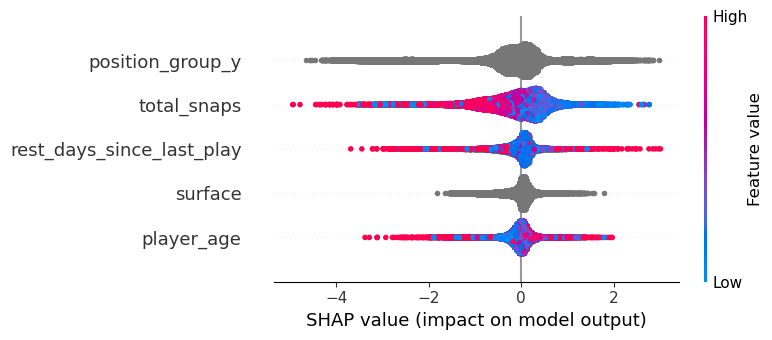

In [64]:
shap.summary_plot(shap_all, X_all, feature_names=feature_names)


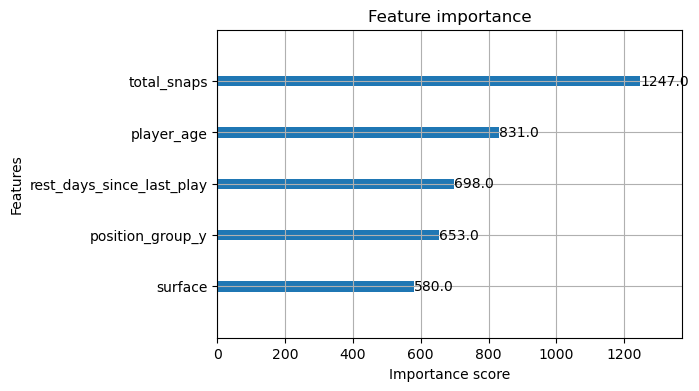

In [65]:

# Plot the feature importance
plot_importance(model)
plt.rcParams['figure.figsize'] = [6, 4] # Adjust plot size
plt.show()

### Trying GPBoost bc mixed effects

In [66]:
from gpboost import GPBoostClassifier



In [67]:
from pandas.api.types import is_categorical_dtype, is_object_dtype


In [68]:
# Make a stable numeric code for each player - reinjury risk
play_filtered["player_group"] = play_filtered["gsis_id"].astype("category").cat.codes
# injury risk
nextweek["player_group"] = nextweek["gsis_id"].astype("category").cat.codes


In [69]:
# on re injury risk, pure gpboost, no mixed effect for player
seasons = np.arange(2014, 2025)
all_shap = []
all_X = []
rocs = []
precs = []
for season in range(1, len(seasons)):
    test_season = seasons[season]
    train_seasons = seasons[:season]
    print(train_seasons, test_season)
    train_df = play_filtered.loc[play_filtered["season"].isin(train_seasons)]
    test_df = play_filtered.loc[play_filtered["season"] == test_season]
    model_gpb_ri = GPBoostClassifier(
        objective="binary",
        n_estimators=200,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42,
)
    X_train = train_df.drop(["reinjured_next_week", "season", "gsis_id", "player_group"], axis=1)
    y_train = train_df["reinjured_next_week"].astype(int)
    X_test = test_df.drop(["reinjured_next_week", "season", "gsis_id", "player_group"], axis=1)


    # turn to int / numeric bc shap wasn't working
    for col in X_train.columns:
        if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):
            train_cat = X_train[col].astype("category")
            X_train[col] = train_cat.cat.codes
            X_test[col] = pd.Categorical(
                X_test[col],
                categories=train_cat.cat.categories
            ).codes

    y_test = test_df["reinjured_next_week"].astype(int)
    model_gpb_ri.fit(X_train, y_train)
    booster = model_gpb_ri.booster_ #get underlying booster (lightgbm bc shap can only work on tree part)
    y_prob = model_gpb_ri.predict_proba(X_test)[:, 1]
    threshold = 0.5
    y_pred = (y_prob >= threshold).astype(int)
    print(f"AP: {average_precision_score(y_test, y_prob)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"CM: {confusion_matrix(y_test, y_pred)}")
    rocs.append(roc_auc_score(y_test, y_prob))
    precs.append(average_precision_score(y_test, y_prob))

    explainer = shap.TreeExplainer(booster)
    raw_shap = explainer.shap_values(X_test)

    # handle binary case (list) vs array
    if isinstance(raw_shap, list):
        shap_values_fold = raw_shap[1]
    else:
        shap_values_fold = raw_shap

    all_shap.append(shap_values_fold)
    all_X.append(X_test.values)   # or X_test.copy() if you want a DataFrame

shap_all = np.vstack(all_shap)
X_all = np.vstack(all_X)
feature_names = X_test.columns  # same order across folds
print(f"Overall average AP: {np.mean(np.array(precs))}")
print(f"Overall average AUC: {np.mean(np.array(rocs))}")

[2014] 2015


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4189786015.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.16011547604638035
ROC AUC: 0.6315330450668796
Accuracy: 0.9146567717996289
CM: [[3440   18]
 [ 304   11]]
[2014 2015] 2016


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4189786015.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.11771133988012497
ROC AUC: 0.6444016309794571
Accuracy: 0.9274243360098826
CM: [[2999   22]
 [ 213    4]]
[2014 2015 2016] 2017


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4189786015.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.13589905809067154
ROC AUC: 0.6572504493629201
Accuracy: 0.9386022207707381
CM: [[2871    8]
 [ 180    3]]
[2014 2015 2016 2017] 2018


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4189786015.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.10976675295968082
ROC AUC: 0.6486011717932622
Accuracy: 0.9333333333333333
CM: [[2645   10]
 [ 179    1]]
[2014 2015 2016 2017 2018] 2019


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4189786015.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.09808327394981042
ROC AUC: 0.6485627653123104
Accuracy: 0.9431818181818182
CM: [[2905    5]
 [ 170    0]]
[2014 2015 2016 2017 2018 2019] 2020


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4189786015.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.1189455309149415
ROC AUC: 0.6234560995594688
Accuracy: 0.935552193645991
CM: [[3091    0]
 [ 213    1]]
[2014 2015 2016 2017 2018 2019 2020] 2021


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4189786015.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.12198344314296239
ROC AUC: 0.6543642706642256
Accuracy: 0.9379652605459057
CM: [[3402    4]
 [ 221    0]]
[2014 2015 2016 2017 2018 2019 2020 2021] 2022


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4189786015.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.11290957612654444
ROC AUC: 0.6216169449757458
Accuracy: 0.9370739381227058
CM: [[3572    1]
 [ 239    2]]
[2014 2015 2016 2017 2018 2019 2020 2021 2022] 2023


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4189786015.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.11970059120412362
ROC AUC: 0.6534369063981592
Accuracy: 0.9409439090684457
CM: [[3808    1]
 [ 238    0]]
[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023] 2024


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4189786015.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.1034386178879034
ROC AUC: 0.6484916644146563
Accuracy: 0.9424242424242424
CM: [[3732    1]
 [ 227    0]]
Overall average AP: 0.11985536602031435
Overall average AUC: 0.6431714948527085


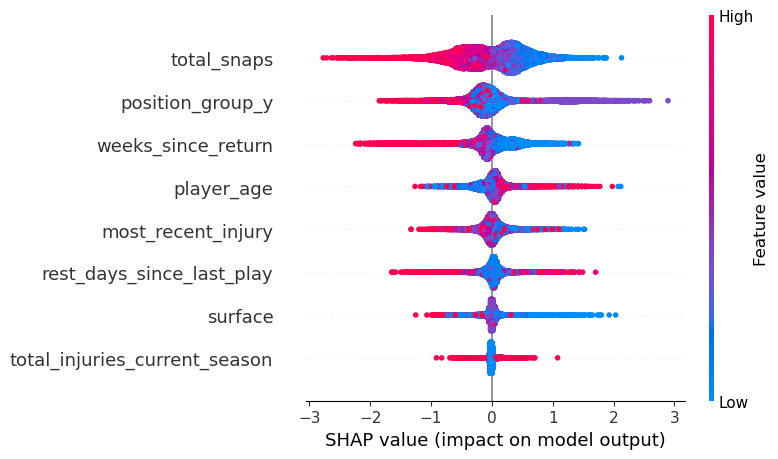

In [70]:
shap.summary_plot(shap_all, X_all, feature_names=feature_names, title="Contributions of Different Features on Re-Injury Risk Predictions (GPBoost)")


In [ ]:
nice_map = {
    "total_snaps": "Snap Count",
    "position_group_y": "Position Group",
    "surface": "Game Surface",
    "rest_days_since_last_play": "Rest Days Since Last Game",
    "player_age": "Player Age",
    "weeks_since_return": "Weeks Since Return", 
    "most_recent_injury": "Category of Most Recent Injury", 
    "total_injuries_current_season": "Total Injuries This Season",
}
feature_names = [nice_map[c] for c in feature_names]

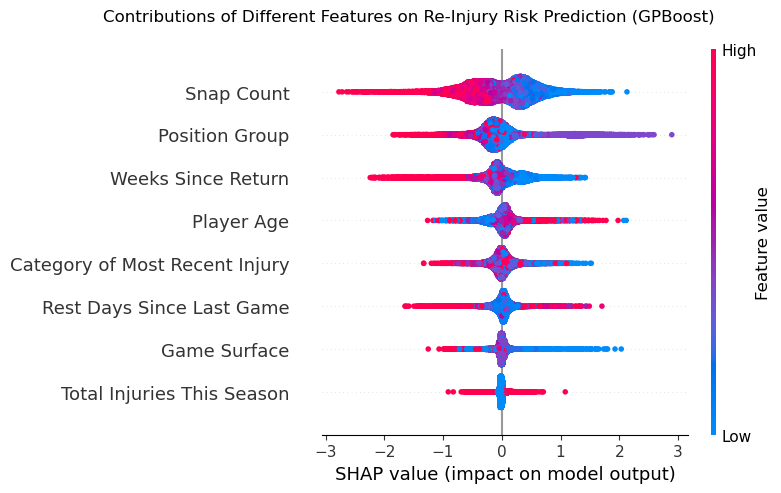

In [113]:
shap.summary_plot(
    shap_all,
    X_all,
    feature_names=feature_names,
    show=False,
)
plt.title(
    "Contributions of Different Features on Re-Injury Risk Prediction (GPBoost)",
    loc="left",
    x=-0.6,
    pad=20,
)

plt.show()

> lowkey looks better than xgboost, even without adding mixed effects part. trying with mixed effect of the player below

Train seasons: [2014]  Test season: 2015


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\227722900.py:39: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.178, AUC: 0.630, Acc: 0.917
CM:
 [[3458    0]
 [ 315    0]]
Train seasons: [2014 2015]  Test season: 2016


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\227722900.py:39: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.137, AUC: 0.649, Acc: 0.933
CM:
 [[3020    1]
 [ 216    1]]
Train seasons: [2014 2015 2016]  Test season: 2017


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\227722900.py:39: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.154, AUC: 0.663, Acc: 0.940
CM:
 [[2879    0]
 [ 183    0]]
Train seasons: [2014 2015 2016 2017]  Test season: 2018


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\227722900.py:39: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.094, AUC: 0.614, Acc: 0.937
CM:
 [[2655    0]
 [ 180    0]]
Train seasons: [2014 2015 2016 2017 2018]  Test season: 2019


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\227722900.py:39: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.096, AUC: 0.627, Acc: 0.945
CM:
 [[2910    0]
 [ 170    0]]
Train seasons: [2014 2015 2016 2017 2018 2019]  Test season: 2020


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\227722900.py:39: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.102, AUC: 0.593, Acc: 0.935
CM:
 [[3091    0]
 [ 214    0]]
Train seasons: [2014 2015 2016 2017 2018 2019 2020]  Test season: 2021


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\227722900.py:39: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.105, AUC: 0.615, Acc: 0.939
CM:
 [[3406    0]
 [ 221    0]]
Train seasons: [2014 2015 2016 2017 2018 2019 2020 2021]  Test season: 2022


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\227722900.py:39: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.113, AUC: 0.623, Acc: 0.937
CM:
 [[3573    0]
 [ 241    0]]
Train seasons: [2014 2015 2016 2017 2018 2019 2020 2021 2022]  Test season: 2023


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\227722900.py:39: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.104, AUC: 0.618, Acc: 0.941
CM:
 [[3809    0]
 [ 238    0]]
Train seasons: [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]  Test season: 2024


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\227722900.py:39: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.104, AUC: 0.631, Acc: 0.943
CM:
 [[3733    0]
 [ 227    0]]


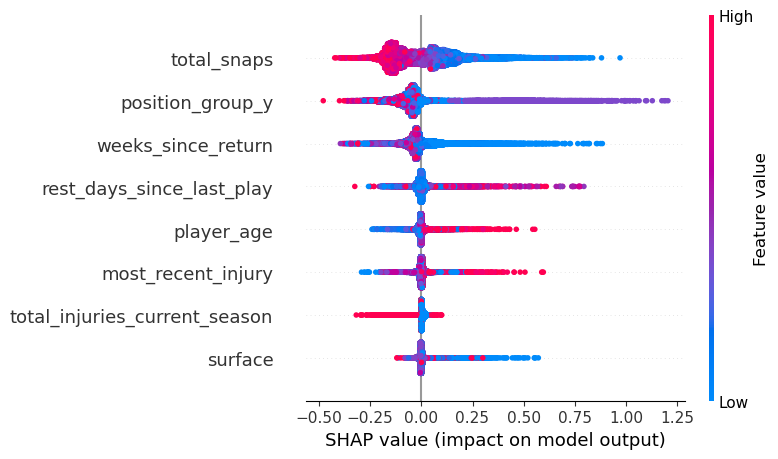

Overall average AP: 0.11852094085555176
Overall average AUC: 0.6263527226552199


In [110]:
import gpboost

# with mixed effect reinjury risk

params = {
    "objective": "binary",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "metric": "auc",
    "verbose": -1,
}

seasons = np.arange(2014, 2025)
all_shap = [] 
all_X = []
precs=[]
rocs=[]
for season_idx in range(1, len(seasons)):
    test_season = seasons[season_idx]
    train_seasons = seasons[:season_idx]
    print("Train seasons:", train_seasons, " Test season:", test_season)

    train_df = play_filtered[play_filtered["season"].isin(train_seasons)].copy()
    test_df  = play_filtered[play_filtered["season"] == test_season].copy()

    y_train = train_df["reinjured_next_week"].astype(int)
    y_test  = test_df["reinjured_next_week"].astype(int)
    # group ids for random effect (player-level)
    group_train = train_df["player_group"].values.reshape(-1, 1)
    group_test  = test_df["player_group"].values.reshape(-1, 1)
    # Features: drop target + season, keep player_group separate
    X_train = train_df.drop(["reinjured_next_week", "season", "gsis_id", "player_group"], axis=1).copy()
    X_test  = test_df.drop(["reinjured_next_week", "season", "gsis_id", "player_group"], axis=1).copy()



    # Encode categoricals -> numeric codes, as before
    for col in X_train.columns:
        if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):
            train_cat = X_train[col].astype("category")
            X_train[col] = train_cat.cat.codes
            X_test[col] = pd.Categorical(
                X_test[col],
                categories=train_cat.cat.categories
            ).codes

    # Build GPModel for random intercepts per player
    gp_model = gpboost.GPModel(group_data=group_train)

    # Build training dataset for boosting
    train_data = gpboost.Dataset(X_train, label=y_train)

    # Train joint model: boosting + random effects
    bst = gpboost.train(
        params=params,
        train_set=train_data,
        gp_model=gp_model,
        num_boost_round=200,
    )

    # Predict probabilities INCLUDING random effects
    pred = bst.predict(
        data=X_test,
        group_data_pred=group_test,
        predict_var=False
    )
    # Depending on version, pred may be dict or array:
    # if dict:
    if isinstance(pred, dict):
        y_prob = pred["response_mean"]
    else:
        y_prob = pred  # if it's already an array of probs

    # Metrics
    ap  = average_precision_score(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    y_pred = (y_prob >= 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    precs.append(ap)
    rocs.append(auc)
    print(f"AP: {ap:.3f}, AUC: {auc:.3f}, Acc: {acc:.3f}")
    print("CM:\n", cm)

    # For SHAP, use the booster as a tree model (fixed-effects part only)
    explainer = shap.TreeExplainer(bst)
    shap_values = explainer.shap_values(X_test)
    if isinstance(shap_values, list):
        shap_values_fold = shap_values[1]
    else:
        shap_values_fold = shap_values

    all_shap.append(shap_values_fold)
    all_X.append(X_test.values)   # or X_test.copy() if you want a DataFrame

shap_all_2 = np.vstack(all_shap)
X_all_2 = np.vstack(all_X)
feature_names = X_test.columns 
shap.summary_plot(shap_all_2, X_all_2, feature_names = feature_names, title = "Contributions of Different Features on Re-Injury Risk With Player-Specific Mixed Effects (GPBoost)")
print(f"Overall average AP: {np.mean(np.array(precs))}")
print(f"Overall average AUC: {np.mean(np.array(rocs))}")


In [111]:
nice_map = {
    "total_snaps": "Snap Count",
    "position_group_y": "Position Group",
    "surface": "Game Surface",
    "rest_days_since_last_play": "Rest Days Since Last Game",
    "player_age": "Player Age",
    "weeks_since_return": "Weeks Since Return", 
    "most_recent_injury": "Category of Most Recent Injury", 
    "total_injuries_current_season": "Total Injuries This Season",
}
feature_names = [nice_map[c] for c in feature_names]

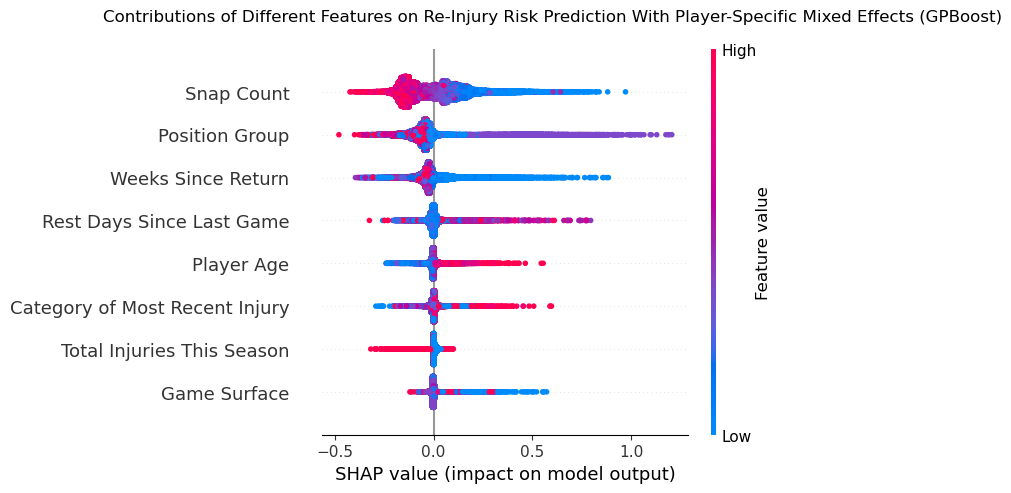

In [112]:
shap.summary_plot(
    shap_all_2,
    X_all_2,
    feature_names=feature_names,
    show=False,
)
plt.title(
    "Contributions of Different Features on Re-Injury Risk Prediction With Player-Specific Mixed Effects (GPBoost)",
    loc="left",
    x=-0.6,
    pad=20,
)

plt.show()

#### not sure how much the mixed effect did? but anyways doing on plain injury risk below

[2014] 2015


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4203450078.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.08988988385087923
ROC AUC: 0.6833445586476182
Accuracy: 0.9533540327821504
CM: [[13203    14]
 [  632     0]]
[2014 2015] 2016


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4203450078.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.0868508744442631
ROC AUC: 0.6680085836602591
Accuracy: 0.9583274870211871
CM: [[13660     1]
 [  593     0]]
[2014 2015 2016] 2017


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4203450078.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.07923018987816771
ROC AUC: 0.6715935560638424
Accuracy: 0.9603454001992694
CM: [[14458     5]
 [  592     0]]
[2014 2015 2016 2017] 2018


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4203450078.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.08002767851518777
ROC AUC: 0.6621976636752351
Accuracy: 0.9622852629500428
CM: [[14620     0]
 [  573     0]]
[2014 2015 2016 2017 2018] 2019


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4203450078.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.08345577979625654
ROC AUC: 0.6668353967999843
Accuracy: 0.9593397745571659
CM: [[14298     1]
 [  605     0]]
[2014 2015 2016 2017 2018 2019] 2020


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4203450078.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.09066712853022715
ROC AUC: 0.6585735009775497
Accuracy: 0.956379916853214
CM: [[14953     0]
 [  682     0]]
[2014 2015 2016 2017 2018 2019 2020] 2021


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4203450078.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.07584992732344473
ROC AUC: 0.6535758367625458
Accuracy: 0.9595000600889316
CM: [[15968     0]
 [  674     0]]
[2014 2015 2016 2017 2018 2019 2020 2021] 2022


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4203450078.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.09024316685926378
ROC AUC: 0.6636157538440085
Accuracy: 0.9564736259682773
CM: [[15558     0]
 [  708     0]]
[2014 2015 2016 2017 2018 2019 2020 2021 2022] 2023


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4203450078.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.09164378017446248
ROC AUC: 0.6590122181572345
Accuracy: 0.9546489563567362
CM: [[15093     0]
 [  717     0]]
[2014 2015 2016 2017 2018 2019 2020 2021 2022 2023] 2024


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\4203450078.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.08695196925184032
ROC AUC: 0.6550151828261861
Accuracy: 0.9549681840430739
CM: [[15608     3]
 [  733     0]]


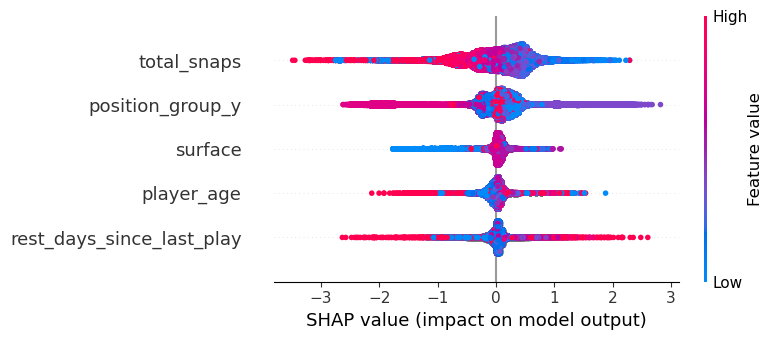

Overall average AP: 0.08548103786239929
Overall average AUC: 0.6641772251414464


In [74]:
# On just injury risk (no mixed effect)
seasons = np.arange(2014, 2025)
all_shap = []
all_X = []
rocs = []
precs = []
for season in range(1, len(seasons)):
    test_season = seasons[season]
    train_seasons = seasons[:season]
    print(train_seasons, test_season)
    train_df = nextweek.loc[nextweek["season"].isin(train_seasons)]
    test_df = nextweek.loc[nextweek["season"] == test_season]
    model_gpb1 = GPBoostClassifier(
        objective="binary",
        n_estimators=200,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42,
)
    X_train = train_df.drop(["injured_after_this_week", "season", "gsis_id", "player_group"], axis=1)
    y_train = train_df["injured_after_this_week"].astype(int)
    X_test = test_df.drop(["injured_after_this_week", "season", "gsis_id", "player_group"], axis=1)


    # turn to int / numeric bc shap wasn't working
    for col in X_train.columns:
        if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):
            train_cat = X_train[col].astype("category")
            X_train[col] = train_cat.cat.codes
            X_test[col] = pd.Categorical(
                X_test[col],
                categories=train_cat.cat.categories
            ).codes

    y_test = test_df["injured_after_this_week"].astype(int)
    model_gpb1.fit(X_train, y_train)
    booster = model_gpb1.booster_ #get underlying booster (lightgbm bc shap can only work on tree part)
    y_prob = model_gpb1.predict_proba(X_test)[:, 1]
    threshold = 0.5
    y_pred = (y_prob >= threshold).astype(int)
    print(f"AP: {average_precision_score(y_test, y_prob)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"CM: {confusion_matrix(y_test, y_pred)}")
    rocs.append(roc_auc_score(y_test, y_prob))
    precs.append(average_precision_score(y_test, y_prob))

    explainer = shap.TreeExplainer(booster)
    shap_values = explainer.shap_values(X_test)
    if isinstance(shap_values, list):
        shap_values_fold = shap_values[1]
    else:
        shap_values_fold = shap_values

    all_shap.append(shap_values_fold)
    all_X.append(X_test.values)   # or X_test.copy() if you want a DataFrame

shap_all_3 = np.vstack(all_shap)
X_all_3 = np.vstack(all_X)
feature_names = X_test.columns 
shap.summary_plot(shap_all_3, X_all_3, feature_names = feature_names, title="Contributions of Different Features on Injury Risk Predictions (GPBoost)")
print(f"Overall average AP: {np.mean(np.array(precs))}")
print(f"Overall average AUC: {np.mean(np.array(rocs))}")

In [ ]:
nice_map = {
    "total_snaps": "Snap Count",
    "position_group_y": "Position Group",
    "surface": "Game Surface",
    "rest_days_since_last_play": "Rest Days Since Last Game",
    "player_age": "Player Age",
    "weeks_since_return": "Weeks Since Return", 
    "most_recent_injury": "Category of Most Recent Injury", 
    "total_injuries_current_season": "Total Injuries This Season",
}
feature_names = [nice_map[c] for c in feature_names]

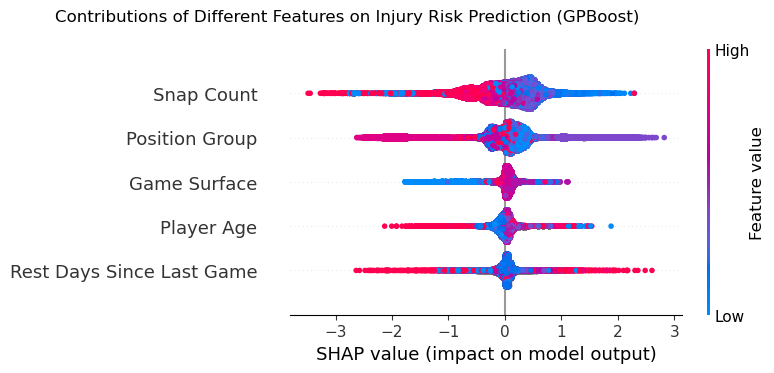

In [108]:
shap.summary_plot(
    shap_all_3,
    X_all_3,
    feature_names=feature_names,
    show=False,
)
plt.title(
    "Contributions of Different Features on Injury Risk Prediction (GPBoost)",
    loc="left",
    x=-0.6,
    pad=20,
)

plt.show()

#### didn't have mixed effects, adding gsis id for player random effects

Train seasons: [2014]  Test season: 2015


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3390438343.py:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.096, AUC: 0.671, Acc: 0.954
CM:
 [[13217     0]
 [  632     0]]
Train seasons: [2014 2015]  Test season: 2016


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3390438343.py:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.093, AUC: 0.670, Acc: 0.958
CM:
 [[13661     0]
 [  593     0]]
Train seasons: [2014 2015 2016]  Test season: 2017


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3390438343.py:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.076, AUC: 0.649, Acc: 0.961
CM:
 [[14460     3]
 [  591     1]]
Train seasons: [2014 2015 2016 2017]  Test season: 2018


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3390438343.py:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.086, AUC: 0.656, Acc: 0.962
CM:
 [[14620     0]
 [  573     0]]
Train seasons: [2014 2015 2016 2017 2018]  Test season: 2019


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3390438343.py:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.088, AUC: 0.652, Acc: 0.959
CM:
 [[14299     0]
 [  605     0]]
Train seasons: [2014 2015 2016 2017 2018 2019]  Test season: 2020


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3390438343.py:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.088, AUC: 0.648, Acc: 0.956
CM:
 [[14953     0]
 [  682     0]]
Train seasons: [2014 2015 2016 2017 2018 2019 2020]  Test season: 2021


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3390438343.py:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.081, AUC: 0.641, Acc: 0.960
CM:
 [[15968     0]
 [  674     0]]
Train seasons: [2014 2015 2016 2017 2018 2019 2020 2021]  Test season: 2022


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3390438343.py:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.085, AUC: 0.634, Acc: 0.956
CM:
 [[15558     0]
 [  708     0]]
Train seasons: [2014 2015 2016 2017 2018 2019 2020 2021 2022]  Test season: 2023


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3390438343.py:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.092, AUC: 0.627, Acc: 0.955
CM:
 [[15093     0]
 [  717     0]]
Train seasons: [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]  Test season: 2024


C:\Users\jenny\AppData\Local\Temp\ipykernel_25464\3390438343.py:37: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):


AP: 0.085, AUC: 0.641, Acc: 0.955
CM:
 [[15611     0]
 [  733     0]]


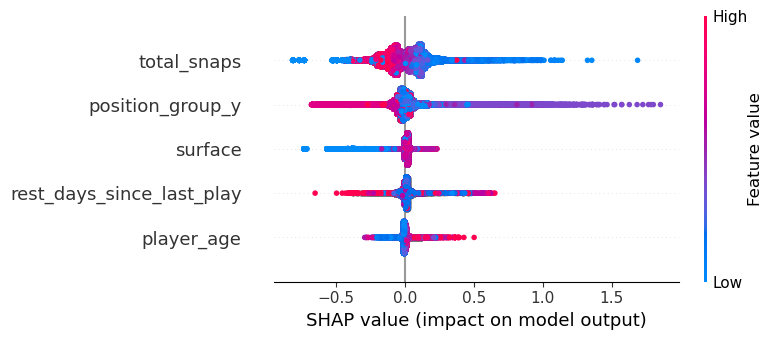

Overall average AP: 0.08685746811402856
Overall average AUC: 0.6489299406868559


In [76]:

# plain injury risk + mixed effect
params = {
    "objective": "binary",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "metric": "auc",
    "verbose": -1,
}

seasons = np.arange(2014, 2025)
all_shap=[]
all_X = []
rocs = []
precs = []
for season_idx in range(1, len(seasons)):
    test_season = seasons[season_idx]
    train_seasons = seasons[:season_idx]
    print("Train seasons:", train_seasons, " Test season:", test_season)

    train_df = nextweek[nextweek["season"].isin(train_seasons)].copy()
    test_df  = nextweek[nextweek["season"] == test_season].copy()

    y_train = train_df["injured_after_this_week"].astype(int)
    y_test  = test_df["injured_after_this_week"].astype(int)
        # group ids for random effect (player-level)
    group_train = train_df["player_group"].values.reshape(-1, 1)
    group_test  = test_df["player_group"].values.reshape(-1, 1)

    # Features: drop target + season, keep player_group separate
    X_train = train_df.drop(["injured_after_this_week", "season", "gsis_id", "player_group"], axis=1).copy()
    X_test  = test_df.drop(["injured_after_this_week", "season", "gsis_id", "player_group"], axis=1).copy()



    # Encode categoricals -> numeric codes, as before
    for col in X_train.columns:
        if is_categorical_dtype(X_train[col]) or is_object_dtype(X_train[col]):
            train_cat = X_train[col].astype("category")
            X_train[col] = train_cat.cat.codes
            X_test[col] = pd.Categorical(
                X_test[col],
                categories=train_cat.cat.categories
            ).codes

    # Build GPModel for random intercepts per player
    gp_model = gpboost.GPModel(group_data=group_train)

    # Build training dataset for boosting
    train_data = gpboost.Dataset(X_train, label=y_train)

    # Train joint model: boosting + random effects
    bst = gpboost.train(
        params=params,
        train_set=train_data,
        gp_model=gp_model,
        num_boost_round=200,
    )

    # Predict probabilities w random effects
    pred = bst.predict(
        data=X_test,
        group_data_pred=group_test,
        predict_var=False
    )
    # Depending on version, pred may be dict or array:
    # if dict:
    if isinstance(pred, dict):
        y_prob = pred["response_mean"]
    else:
        y_prob = pred  # if it's already an array of probs

    # Metrics
    ap  = average_precision_score(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    y_pred = (y_prob >= 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)

    print(f"AP: {ap:.3f}, AUC: {auc:.3f}, Acc: {acc:.3f}")
    print("CM:\n", cm)
    rocs.append(auc)
    precs.append(ap)

    # For SHAP, use the booster as a tree model (fixed-effects part only)
    explainer = shap.TreeExplainer(bst)
    shap_values = explainer.shap_values(X_test)
    if isinstance(shap_values, list):
        shap_values_fold = shap_values[1]
    else:
        shap_values_fold = shap_values

    all_shap.append(shap_values_fold)
    all_X.append(X_test.values)   # or X_test.copy() if you want a DataFrame

shap_all_4 = np.vstack(all_shap)
X_all_4 = np.vstack(all_X)
feature_names = X_test.columns 
shap.summary_plot(shap_all_4, X_all_4, feature_names = feature_names, title="Contributions of Different Features on Injury Risk Predictions with Player-Specific Mixed Effects (GPBoost)")

print(f"Overall average AP: {np.mean(np.array(precs))}")
print(f"Overall average AUC: {np.mean(np.array(rocs))}")

In [ ]:
nice_map = {
    "total_snaps": "Snap Count",
    "position_group_y": "Position Group",
    "surface": "Game Surface",
    "rest_days_since_last_play": "Rest Days Since Last Game",
    "player_age": "Player Age",
    "weeks_since_return": "Weeks Since Return", 
    "most_recent_injury": "Category of Most Recent Injury", 
    "total_injuries_current_season": "Total Injuries This Season",
}
feature_names = [nice_map[c] for c in feature_names]


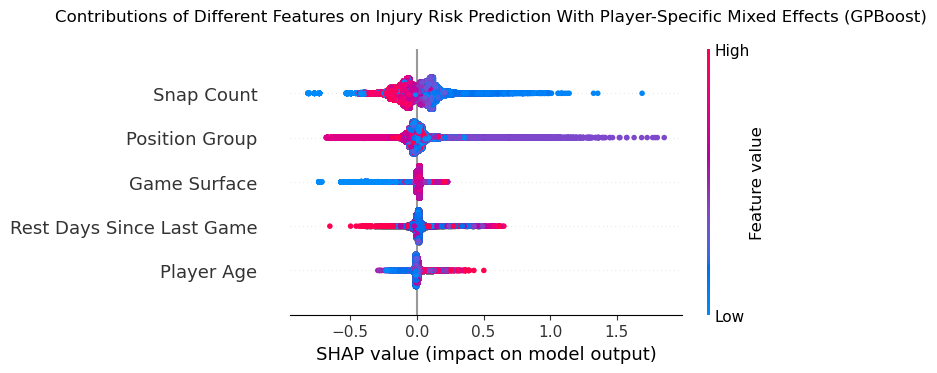

In [107]:
shap.summary_plot(
    shap_all_4,
    X_all_4,
    feature_names=feature_names,
    show=False,
)
plt.title(
    "Contributions of Different Features on Injury Risk Prediction With Player-Specific Mixed Effects (GPBoost)",
    loc="left",
    x=-0.6,
    pad=20,
)

plt.show()

### doing just stats / looking at differences if we care

In [78]:
surf.groupby("most_recent_injury")['injured_after_this_week'].mean()

most_recent_injury
Abdomen/Core              0.044860
Ankle/Foot                0.049126
Arm                       0.041758
Back                      0.050000
Chest/Rib                 0.050671
Hamstring                 0.046110
Head/Concussion           0.039830
Hip/Glute                 0.052108
Illness/OtherNonInjury    0.043851
Knee                      0.046661
Neck                      0.058180
None                      0.042354
Other                     0.050335
Quad/Thigh/Groin          0.046529
Shoulder                  0.053582
Wrist/Hand                0.046436
Name: injured_after_this_week, dtype: float64

In [79]:
surf.groupby("most_recent_injury")['total_injuries_current_season'].mean()

most_recent_injury
Abdomen/Core              0.641121
Ankle/Foot                0.731069
Arm                       0.714286
Back                      0.645225
Chest/Rib                 0.711130
Hamstring                 0.854129
Head/Concussion           0.813745
Hip/Glute                 0.587454
Illness/OtherNonInjury    0.586988
Knee                      0.731521
Neck                      0.733295
None                      0.000030
Other                     0.687580
Quad/Thigh/Groin          0.676074
Shoulder                  0.662755
Wrist/Hand                0.732901
Name: total_injuries_current_season, dtype: float64

In [80]:
surf.groupby("most_recent_injury")['total_snaps'].mean()

most_recent_injury
Abdomen/Core              34.863551
Ankle/Foot                30.746511
Arm                       29.191209
Back                      33.155618
Chest/Rib                 35.067129
Hamstring                 30.984821
Head/Concussion           32.650180
Hip/Glute                 34.844341
Illness/OtherNonInjury    32.574118
Knee                      29.843893
Neck                      34.137673
None                      39.694726
Other                     33.692856
Quad/Thigh/Groin          34.385838
Shoulder                  33.422792
Wrist/Hand                32.950684
Name: total_snaps, dtype: float64

In [81]:
surf.groupby("most_recent_injury")['rest_days_since_last_play'].mean()

most_recent_injury
Abdomen/Core               8.982323
Ankle/Foot                 5.691900
Arm                       12.099644
Back                       9.115519
Chest/Rib                  8.835127
Hamstring                  6.963577
Head/Concussion            7.221398
Hip/Glute                  7.349377
Illness/OtherNonInjury     9.997551
Knee                       6.366663
Neck                      10.386213
None                       9.853237
Other                      9.684697
Quad/Thigh/Groin           7.759838
Shoulder                   4.410081
Wrist/Hand                 3.060731
Name: rest_days_since_last_play, dtype: float64

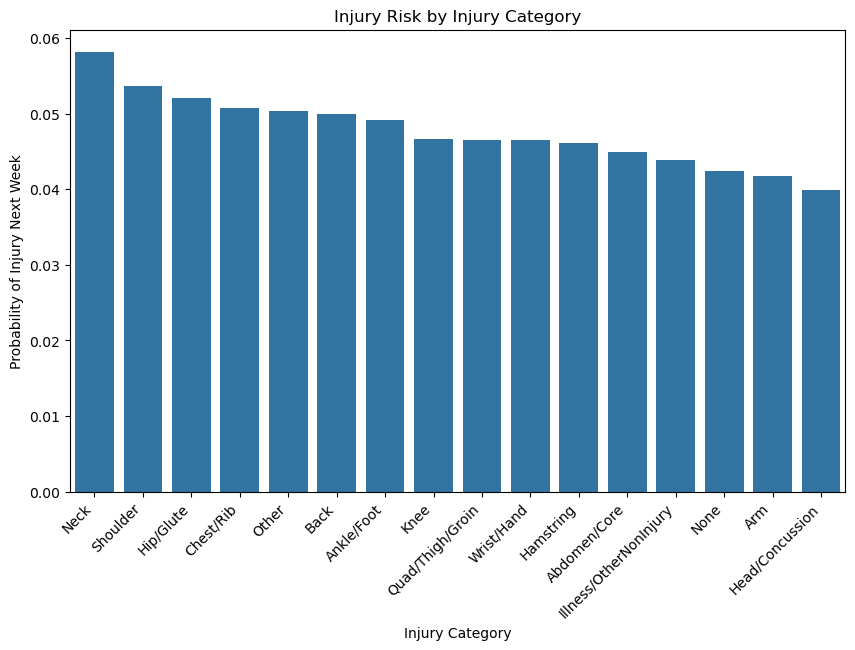

In [82]:
import seaborn as sns
injury_rates = (
    surf.groupby("most_recent_injury")["injured_after_this_week"]
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=injury_rates,
    x="most_recent_injury",
    y="injured_after_this_week"
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Probability of Injury Next Week")
plt.xlabel("Injury Category")
plt.title("Injury Risk by Injury Category")
plt.show()


In [83]:
surf['rest_days_since_last_play'].describe() # why are there negative numbers

count    174411.000000
mean          8.844947
std          88.710978
min       -3759.000000
25%           7.000000
50%           7.000000
75%          10.000000
max        2170.000000
Name: rest_days_since_last_play, dtype: float64

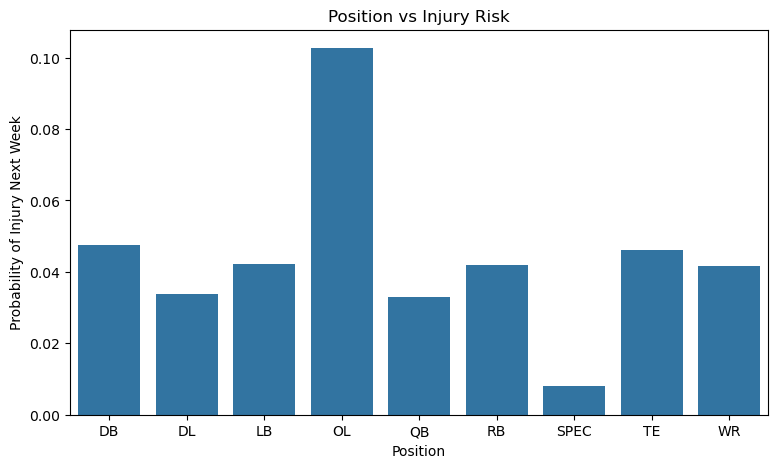

In [84]:
temp = (
    surf.groupby("position_group_y")["injured_after_this_week"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.barplot(data=temp, x="position_group_y", y="injured_after_this_week")
plt.xlabel("Position")
plt.ylabel("Probability of Injury Next Week")
plt.title("Position vs Injury Risk")
plt.show()


In [85]:
surf

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,player_age,rest_days_since_last_play,surface,_merge,injured_after_this_week,most_recent_injury
0,0,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,1.0,K,SPEC,...,NaN,NaN,False,0,39.0,NaN,matrixturf,both,False,None
1,1,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,2.0,K,SPEC,...,NaN,NaN,False,0,39.0,7.0,grass,both,False,None
2,2,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,3.0,K,SPEC,...,NaN,NaN,False,0,39.0,7.0,grass,both,False,None
3,3,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,4.0,K,SPEC,...,NaN,NaN,False,0,39.0,7.0,grass,both,False,None
4,4,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,5.0,K,SPEC,...,NaN,NaN,False,0,39.0,7.0,grass,both,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222916,221582,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,14.0,T,OL,...,14.0,0.0,False,1,22.0,36.0,matrixturf,both,False,Other
222917,221583,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,15.0,T,OL,...,14.0,1.0,False,1,22.0,6.0,grass,both,True,Other
222918,221584,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,17.0,T,OL,...,NaN,NaN,True,1,22.0,NaN,NaN,left_only,False,Ankle/Foot
222919,221585,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,18.0,T,OL,...,NaN,NaN,False,2,22.0,NaN,NaN,left_only,False,Ankle/Foot


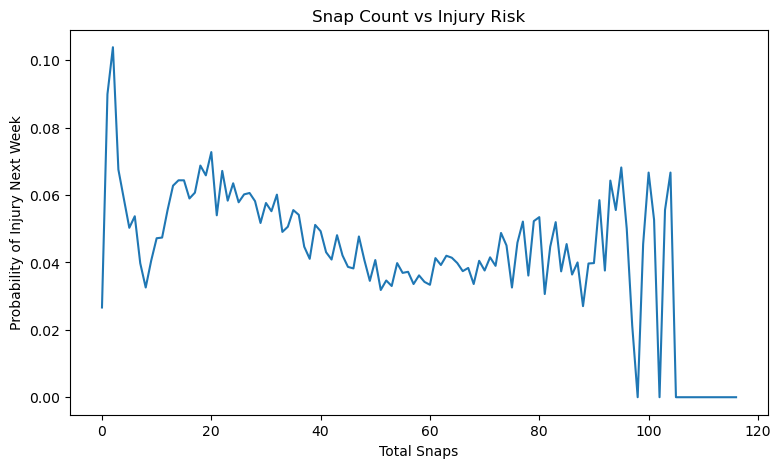

In [86]:
temp = (
    surf.groupby("total_snaps")["injured_after_this_week"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.lineplot(data=temp, x="total_snaps", y="injured_after_this_week")
plt.xlabel("Total Snaps")
plt.ylabel("Probability of Injury Next Week")
plt.title("Snap Count vs Injury Risk")
plt.show()

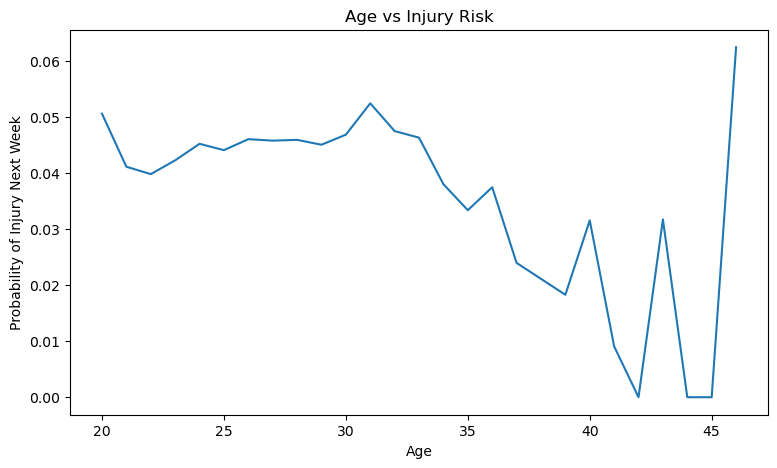

In [87]:
temp = (
    surf.groupby("player_age")["injured_after_this_week"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.lineplot(data=temp, x="player_age", y="injured_after_this_week")
plt.xlabel("Age")
plt.ylabel("Probability of Injury Next Week")
plt.title("Age vs Injury Risk")
plt.show()

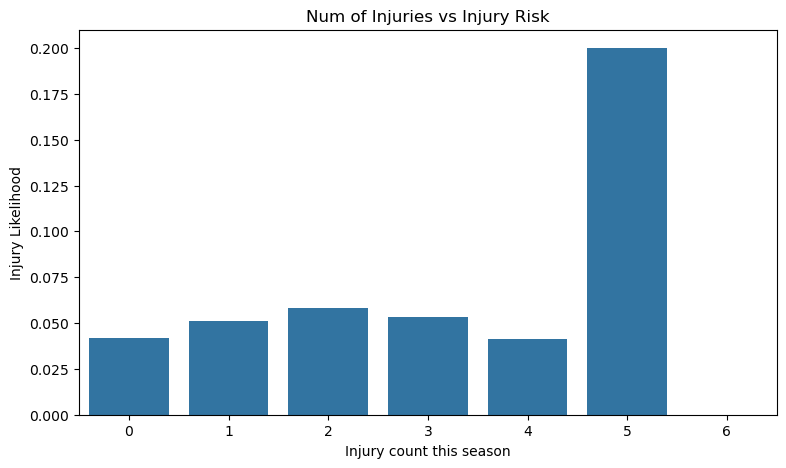

In [88]:
temp = (
    surf.groupby("total_injuries_current_season")["injured_after_this_week"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.barplot(data=temp, x="total_injuries_current_season", y="injured_after_this_week")
plt.xlabel("Injury count this season")
plt.ylabel("Injury Likelihood")
plt.title("Num of Injuries vs Injury Risk")
plt.show()

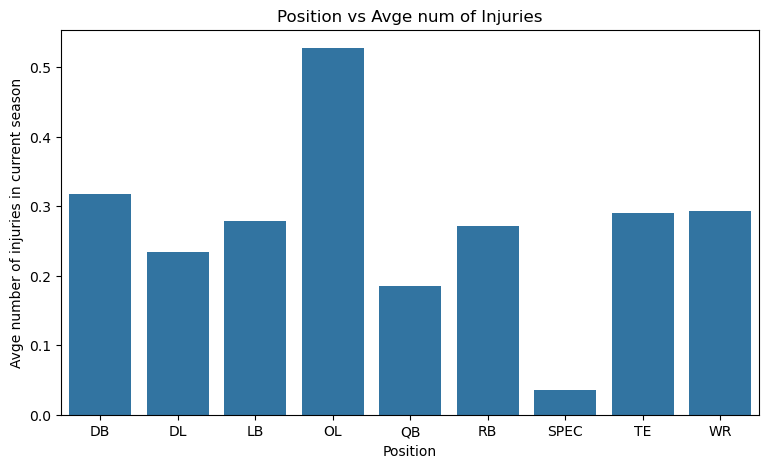

In [89]:
temp = (
    surf.groupby("position_group_y")["total_injuries_current_season"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.barplot(data=temp, x="position_group_y", y="total_injuries_current_season")
plt.xlabel("Position")
plt.ylabel("Avge number of injuries in current season")
plt.title("Position vs Avge num of Injuries")
plt.show()

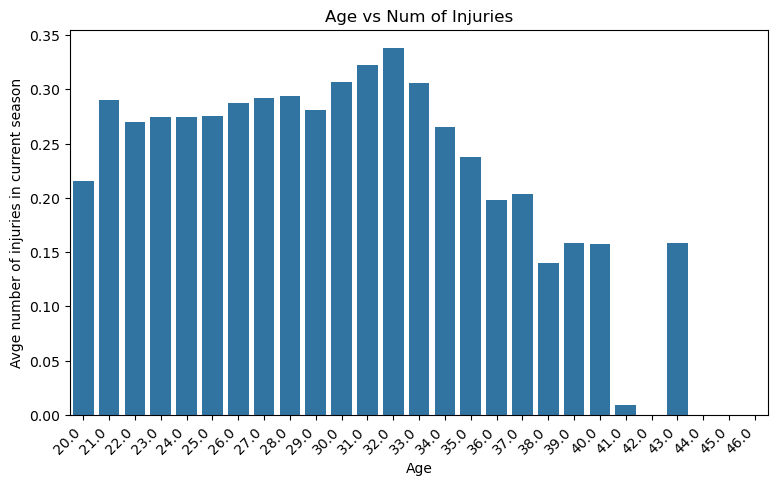

In [90]:
temp = (
    surf.groupby("player_age")["total_injuries_current_season"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.barplot(data=temp, x="player_age", y="total_injuries_current_season")
plt.xlabel("Age")
plt.xticks(rotation=45, ha="right")

plt.ylabel("Avge number of injuries in current season")
plt.title("Age vs Num of Injuries")
plt.show()

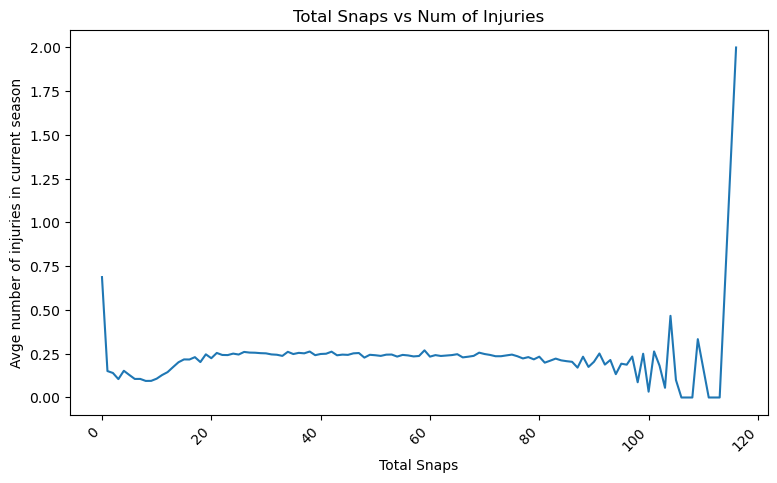

In [91]:
temp = (
    surf.groupby("total_snaps")["total_injuries_current_season"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.lineplot(data=temp, x="total_snaps", y="total_injuries_current_season")
plt.xlabel("Total Snaps")
plt.xticks(rotation=45, ha="right")

plt.ylabel("Avge number of injuries in current season")
plt.title("Total Snaps vs Num of Injuries")
plt.show()

In [92]:
surf

,Unnamed: 0,gsis_id,display_name,birth_date,height,weight,season,week,position,position_group_y,...,return_week,weeks_since_return,is_injury_start,total_injuries_current_season,player_age,rest_days_since_last_play,surface,_merge,injured_after_this_week,most_recent_injury
0,0,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,1.0,K,SPEC,...,NaN,NaN,False,0,39.0,NaN,matrixturf,both,False,None
1,1,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,2.0,K,SPEC,...,NaN,NaN,False,0,39.0,7.0,grass,both,False,None
2,2,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,3.0,K,SPEC,...,NaN,NaN,False,0,39.0,7.0,grass,both,False,None
3,3,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,4.0,K,SPEC,...,NaN,NaN,False,0,39.0,7.0,grass,both,False,None
4,4,00-0004091,Phil Dawson,1975-01-23,71.0,200.0,2014.0,5.0,K,SPEC,...,NaN,NaN,False,0,39.0,7.0,grass,both,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222916,221582,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,14.0,T,OL,...,14.0,0.0,False,1,22.0,36.0,matrixturf,both,False,Other
222917,221583,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,15.0,T,OL,...,14.0,1.0,False,1,22.0,6.0,grass,both,True,Other
222918,221584,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,17.0,T,OL,...,NaN,NaN,True,1,22.0,NaN,NaN,left_only,False,Ankle/Foot
222919,221585,00-0039925,Amarius Mims,2002-10-14,80.0,350.0,2024.0,18.0,T,OL,...,NaN,NaN,False,2,22.0,NaN,NaN,left_only,False,Ankle/Foot


In [93]:
temp = surf.copy()
temp['prev_injury_any'] = temp['total_injuries_current_season'] > 0

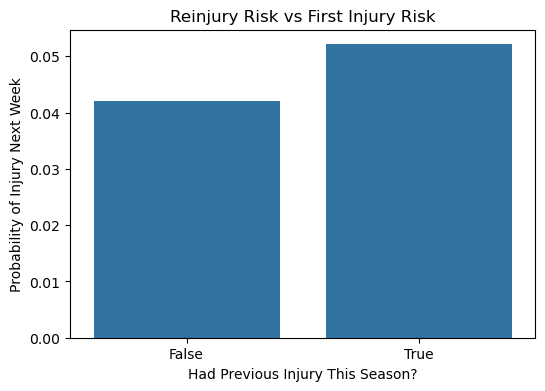

In [94]:
tmp = (
    temp.groupby("prev_injury_any")["injured_after_this_week"]
      .mean()
      .reset_index()
)

sns.barplot(data=tmp, x="prev_injury_any", y="injured_after_this_week")
plt.xlabel("Had Previous Injury This Season?")
plt.ylabel("Probability of Injury Next Week")
plt.title("Reinjury Risk vs First Injury Risk")
plt.show()


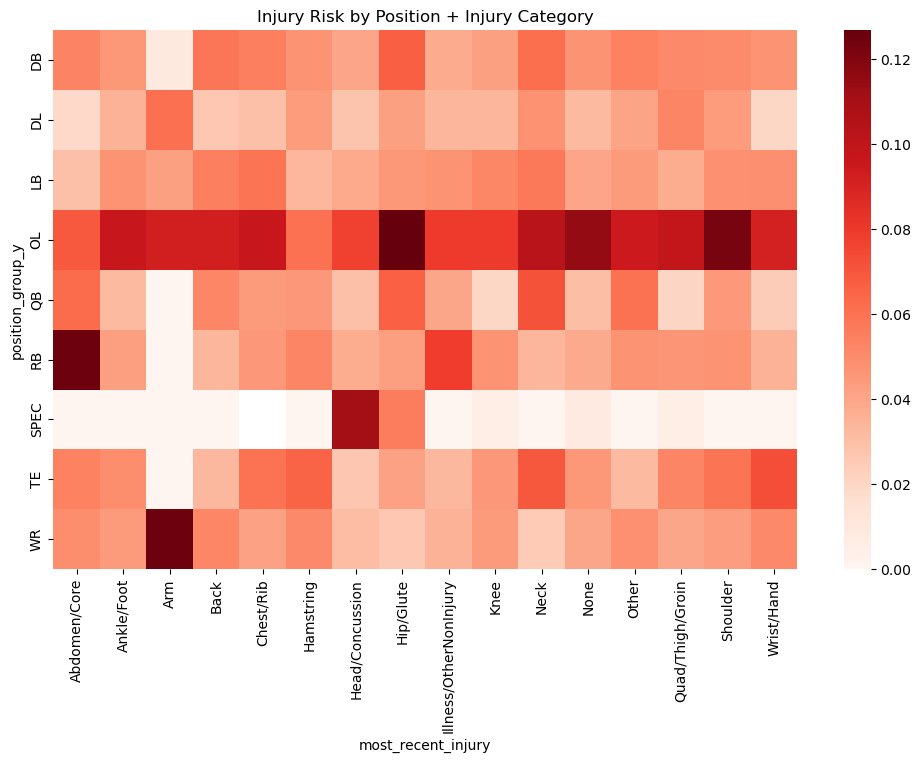

In [95]:
pivot = (
    surf.pivot_table(
        index="position_group_y",
        columns="most_recent_injury",
        values="injured_after_this_week",
        aggfunc="mean"
    )
)

plt.figure(figsize=(12,7))
sns.heatmap(pivot, cmap="Reds")
plt.title("Injury Risk by Position + Injury Category")
plt.show()
